In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

In [2]:
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

In [3]:
np.corrcoef(street, garage)[0, 1]

-1.0

Text(0, 0.5, 'Garage')

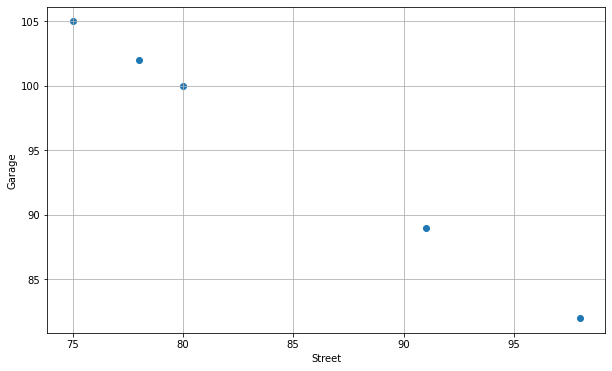

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = street, y = garage)
plt.grid(True)
plt.xlabel("Street")
plt.ylabel("Garage")

In [5]:
df = pd.read_csv("bitcoin.csv")

In [6]:
projection = 14
df['predict'] = df['close'].shift(-projection)

In [7]:
x = pd.DataFrame(df, columns=['close']) # подаём на вход модели
y = pd.DataFrame(df, columns=['predict']) # то, что хотим получить
x = np.array(x, type(float)) # Нормализация для нормального среза
y = np.array(y, type(float))

In [8]:
x = x[:-projection]
y = y[:-projection]

In [9]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

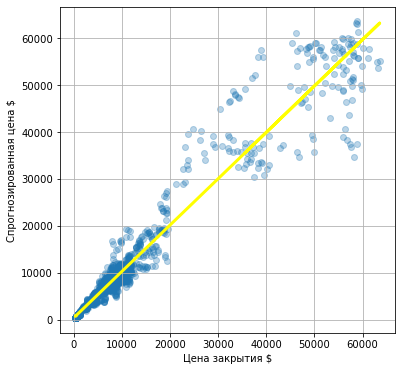

In [10]:
plt.figure(figsize=(6,6))
plt.grid(True)
plt.scatter(x, y, alpha=0.3)

plt.plot(x, model.predict(x), color='yellow', linewidth=3)
plt.xlabel('Цена закрытия $')
plt.ylabel('Спрогнозированная цена $')
plt.show()

In [11]:
model.coef_ # Угловой коэффициент линии регрессии

array([[0.98893729]])

In [12]:
math.degrees(math.atan(model.coef_)) # Угол наклона линии регрессии

44.681317350771

In [13]:
model.intercept_ # y-перехват

array([354.08558181])

In [14]:
fourteen_days_prediction = model.predict(np.array(pd.DataFrame(df, columns=['close']))[-projection:])
fourteen_days_prediction

array([[34582.76786095],
       [35622.15084671],
       [37232.3781069 ],
       [36631.77670928],
       [37515.36251368],
       [39149.75940135],
       [36807.79765831],
       [35499.33472412],
       [35756.62654   ],
       [33565.42828749],
       [33393.86744566],
       [37332.01353931],
       [36629.07691047],
       [36789.82866767]])

In [15]:
model.score(x, y)

0.9490624388820347

In [16]:
fourteen_close = np.array(df[['close']][-projection:])
fourteen_close

array([[34611.58],
       [35662.59],
       [37290.83],
       [36683.51],
       [37576.98],
       [39229.66],
       [36861.5 ],
       [35538.4 ],
       [35798.57],
       [33582.86],
       [33409.38],
       [37391.58],
       [36680.78],
       [36843.33]])

In [17]:
np.max(np.absolute(fourteen_close - fourteen_days_prediction))

79.90059865200601

In [18]:
data = pd.read_csv('housePrice.csv')

In [19]:
data.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [20]:
data['Address'] = data['Address'].fillna('other')

In [21]:
data.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [22]:
data = data.drop_duplicates()

In [23]:
cond = data['Area'].apply(lambda a: len(a) <= 3)
data = data.where(cond).dropna()
data['Area'] = pd.to_numeric(data['Area'])

In [24]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)

In [25]:
x = data['Area']
y = data['Price(USD)']
b = estimate_coef(x, y)
b

(-119725.7692670658, 2802.7164785605582)

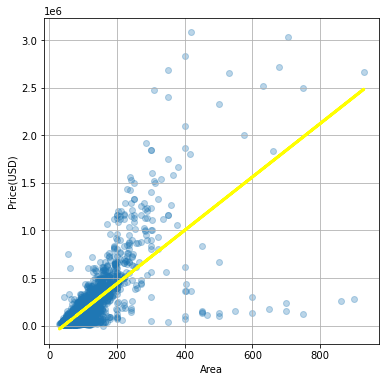

In [26]:
from numpy import size


plt.figure(figsize=(6, 6))
plt.grid(True)
plt.scatter(x, y, alpha=0.3)

y_pred = b[0] + b[1] * x

plt.plot(x, y_pred, color='yellow', linewidth=3)
plt.xlabel('Area')
plt.ylabel('Price(USD)')
plt.show()

In [27]:
math.degrees(math.atan(b[1]))

89.97955705562084

In [28]:
b[0] # y-перехват

-119725.7692670658